### 필수과제2
- 데이터를 제공할 예정
- 해당 데이터를 가지고 기존에 배웠던, OLS~ 변수에 대한 설명령 이해 이런 부분에다가 추가로 오늘 배운 내용까지 해서 최적의 모델링, alpha 값까지 찾아서
- 정리해서 제출해주세요!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dat = pd.read_csv("물류데이터.csv")

In [5]:
dat

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3
...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6
31682,31682,4127300065073100,5011000264061200,지갑,7


### 데이터 전처리

In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [7]:
dat.describe()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,운송장_건수
count,31684.000000,3.168400e+04,3.168400e+04,31684.000000
mean,15841.500000,4.648814e+15,3.801369e+15,4.879308
std,9146.527301,8.341336e+14,1.314660e+15,6.756473
min,0.000000,1.111000e+15,1.111000e+15,3.000000
25%,7920.750000,4.713000e+15,2.826000e+15,3.000000
50%,15841.500000,5.011000e+15,4.159000e+15,3.000000
75%,23762.250000,5.013001e+15,5.011000e+15,5.000000
max,31683.000000,5.013001e+15,5.013001e+15,413.000000


In [8]:
# 결측치 확인
dat.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

In [9]:
# index 컬럼 제거
dat = dat.drop(["index"], axis=1, inplace=False)

In [10]:
# 송하인, 수하인 격자공간고유번호를 각각 4등분하여 별개의 변수로 저장
dat["ship_1"] = dat["송하인_격자공간고유번호"].astype(str).str[0:4].astype(int)
dat["ship_2"] = dat["송하인_격자공간고유번호"].astype(str).str[4:8].astype(int)
dat["ship_3"] = dat["송하인_격자공간고유번호"].astype(str).str[8:12].astype(int)
dat["ship_4"] = dat["송하인_격자공간고유번호"].astype(str).str[12:16].astype(int)

dat["recv_1"] = dat["수하인_격자공간고유번호"].astype(str).str[0:4].astype(int)
dat["recv_2"] = dat["수하인_격자공간고유번호"].astype(str).str[4:8].astype(int)
dat["recv_3"] = dat["수하인_격자공간고유번호"].astype(str).str[8:12].astype(int)
dat["recv_4"] = dat["수하인_격자공간고유번호"].astype(str).str[12:16].astype(int)

# 기존의 송하인, 수하인 격자공간고유번호 컬럼 제거
dat = dat.drop(["송하인_격자공간고유번호", "수하인_격자공간고유번호"], axis=1, inplace=False)

In [11]:
# 범주형 데이터에 대해 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

dat2 = pd.DataFrame()
encoder = LabelEncoder()

encoder.fit(dat["물품_카테고리"])
dat2["물품_카테고리_en"] = encoder.transform(dat["물품_카테고리"])

encoder.fit(dat["ship_1"])
dat2["ship_1_en"] = encoder.transform(dat["ship_1"])
encoder.fit(dat["ship_2"])
dat2["ship_2_en"] = encoder.transform(dat["ship_2"])
encoder.fit(dat["ship_3"])
dat2["ship_3_en"] = encoder.transform(dat["ship_3"])
encoder.fit(dat["ship_4"])
dat2["ship_4_en"] = encoder.transform(dat["ship_4"])

encoder.fit(dat["recv_1"])
dat2["recv_1_en"] = encoder.transform(dat["recv_1"])
encoder.fit(dat["recv_2"])
dat2["recv_2_en"] = encoder.transform(dat["recv_2"])
encoder.fit(dat["recv_3"])
dat2["recv_3_en"] = encoder.transform(dat["recv_3"])
encoder.fit(dat["recv_4"])
dat2["recv_4_en"] = encoder.transform(dat["recv_4"])

In [12]:
# 데이터 스케일링
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#dat2 = scaler.fit_transform(dat2)
#dat2 = pd.DataFrame(dat2, columns=["물품_카테고리", "ship_1", "ship_2", "ship_3", "ship_4", "recv_1", "recv_2", "recv_3", "recv_4"])

dat2["운송장_건수"] = dat["운송장_건수"]

In [13]:
dat.head()

,물품_카테고리,운송장_건수,ship_1,ship_2,ship_3,ship_4,recv_1,recv_2,recv_3,recv_4
0,음반,3,5011,5,9501,7300,2871,1,9206,9300
1,문화컨텐츠,3,4148,6,9004,3300,5011,2,6402,4400
2,농산물,3,5011,0,7806,8400,1120,0,700,5400
3,기타식품,7,4127,1000,4800,6400,5011,5,8701,9400
4,농산물,3,5011,0,7806,8400,2823,7000,1007,6300


In [14]:
dat2.head()

,물품_카테고리_en,ship_1_en,ship_2_en,ship_3_en,ship_4_en,recv_1_en,recv_2_en,recv_3_en,recv_4_en,운송장_건수
0,67,213,5,924,30,57,1,1003,38,3
1,34,92,6,887,14,227,2,699,19,3
2,27,213,0,776,35,3,0,77,23,3
3,17,81,14,482,27,227,5,945,39,7
4,27,213,0,776,35,54,37,117,26,3


In [36]:
dat3 = dat2[["물품_카테고리_en", "ship_1_en", "recv_1_en", "recv_3_en", "운송장_건수"]]

### 데이터 분할

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
y = np.array(dat2["운송장_건수"])
X = dat2.drop(["운송장_건수"], axis=1, inplace=False)

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

### 진행할 회귀분석
- KNN 회귀
- 단순 선형 회귀
- 다중 회귀
- 릿지, 라쏘, 엘라스틱넷 회귀

### KNN 회귀

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [18]:
rmse_val = []
for K in range(20):
    K = K + 1
    model = KNeighborsRegressor(n_neighbors=K, weights='distance', p=1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value k =',K,':',error)
print('가장최소 rmse',min(rmse_val), '가장 최소 k =', rmse_val.index(min(rmse_val))+1)

RMSE value k = 1 : 7.429449364683946
RMSE value k = 2 : 6.35737534732898
RMSE value k = 3 : 6.12258744658969
RMSE value k = 4 : 5.990034475068517
RMSE value k = 5 : 5.880103010574895
RMSE value k = 6 : 5.775522561485559
RMSE value k = 7 : 5.774300387309621
RMSE value k = 8 : 5.763073264676051
RMSE value k = 9 : 5.716002937667066
RMSE value k = 10 : 5.697948150837634
RMSE value k = 11 : 5.71120563597102
RMSE value k = 12 : 5.68171239304214
RMSE value k = 13 : 5.662722360655525
RMSE value k = 14 : 5.642146597447499
RMSE value k = 15 : 5.636323713471451
RMSE value k = 16 : 5.643058271187773
RMSE value k = 17 : 5.632535404287719
RMSE value k = 18 : 5.625529009273409
RMSE value k = 19 : 5.620109090542525
RMSE value k = 20 : 5.615912606709914
가장최소 rmse 5.615912606709914 가장 최소 k = 20


- k의 값이 커질수록 RMSE 값이 지속적으로 작아짐을 확인할 수 있다.
- 범주형 데이터에서는 사용하기 어려운 것으로 보인다.

### 단순 선형 회귀

In [19]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [21]:
model1 = sm.OLS.from_formula("운송장_건수~ship_1_en", data=dat2)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 운송장_건수   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     147.4
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           7.53e-34
Time:                        01:10:54   Log-Likelihood:            -1.0542e+05
No. Observations:               31684   AIC:                         2.108e+05
Df Residuals:                   31682   BIC:                         2.109e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2330      0.118     52.937      0.000       6.002       6.464
ship_1_en     -0.0075      0.001    -12.142      0.000      -0.009      -0.006
==============================================================================
Omnibus:                    66753.059   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        554508532.540
Skew:                          18.060   Prob(JB):                         0.00
Kurtosis:                     650.089   Cond. No.                         590.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model4 = sm.OLS.from_formula("운송장_건수~물품_카테고리_en", data=dat2)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 운송장_건수   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.250
Date:                Sun, 16 Jul 2023   Prob (F-statistic):             0.0393
Time:                        01:11:06   Log-Likelihood:            -1.0549e+05
No. Observations:               31684   AIC:                         2.110e+05
Df Residuals:                   31682   BIC:                         2.110e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7320      0.081     58.490      0.000       4.573       4.891
물품_카테고리_en     0.0046      0.002      2.062      0.039       0.000       0.009
==============================================================================
Omnibus:                    66797.202   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        555123508.655
Skew:                          18.089   Prob(JB):                         0.00
Kurtosis:                     650.446   Cond. No.                         76.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared가 매우 작게 나온다.
- 모델이 적절하지 않음을 확인할 수 있다.

### 다중 회귀

In [23]:
import matplotlib.gridspec as gridspec

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib

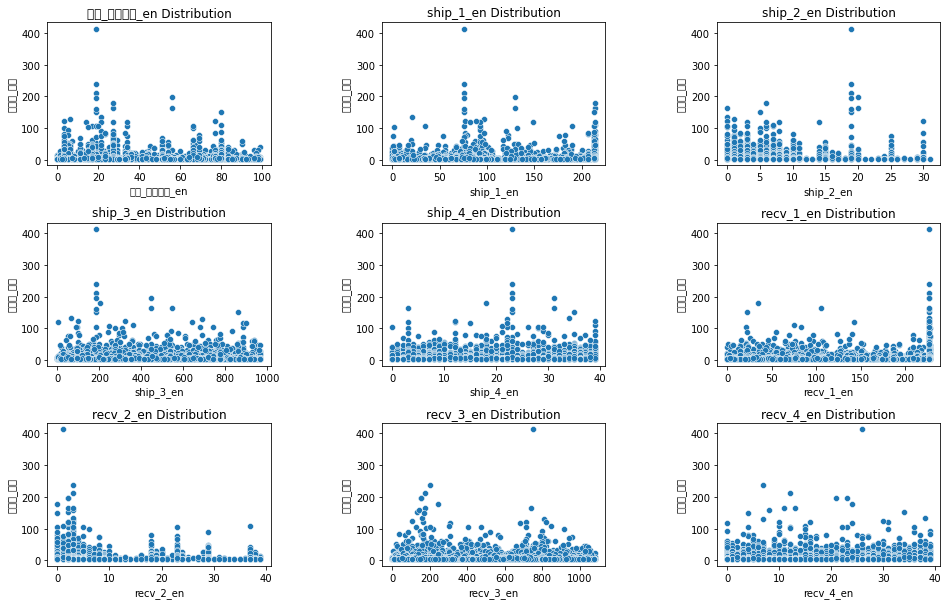

In [24]:
grid = gridspec.GridSpec(3,3)
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.4)


dat2_feature = ["물품_카테고리_en", "ship_1_en", "ship_2_en", "ship_3_en", "ship_4_en", 
                "recv_1_en", "recv_2_en", "recv_3_en", "recv_4_en"]

for idx, feature in enumerate(dat2_feature):
    ax = plt.subplot(grid[idx])
    sns.scatterplot(x = feature,
                   y='운송장_건수',
                   data= dat2,
                   ax= ax)
    ax.set_title(f'{feature} Distribution')

In [27]:
model5 = sm.OLS.from_formula("운송장_건수~"+"*".join(["ship_1_en","ship_2_en","ship_3_en","ship_4_en"]) + "+물품_카테고리_en", data=dat2)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 운송장_건수   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     18.97
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           9.33e-55
Time:                        01:12:25   Log-Likelihood:            -1.0534e+05
No. Observations:               31684   AIC:                         2.107e+05
Df Residuals:                   31667   BIC:                         2.109e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   5.9235      0.462     12.814      0.000       5.017       6.830
ship_1_en                                  -0.0099      0.003     -3.445      0.001      -0.016      -0.004
ship_2_en                                  -0.0481      0.044     -1.093      0.274      -0.134       0.038
ship_1_en:ship_2_en                         0.0013      0.000      3.205      0.001       0.001       0.002
ship_3_en                                  -0.0017      0.001     -1.441      0.150      -0.004       0.001
ship_1_en:ship_3_en                      1.775e-05   7.27e-06      2.442      0.015    3.51e-06     3.2e-05
ship_2_en:ship_3_en                         0.0004      0.000      2.420      0.016    6.77e-05       0.001
ship_1_en:ship_2_en:ship_3_en            -3.41e-06   1.08e-06     -3.166      0.002   -5.52e-06    -1.3e-06
ship_4_en                                  -0.0110      0.020     -0.548      0.584      -0.051       0.028
ship_1_en:ship_4_en                         0.0003      0.000      2.454      0.014    6.35e-05       0.001
ship_2_en:ship_4_en                         0.0099      0.002      4.502      0.000       0.006       0.014
ship_1_en:ship_2_en:ship_4_en              -0.0001   1.89e-05     -5.852      0.000      -0.000   -7.35e-05
ship_3_en:ship_4_en                         0.0001    5.3e-05      2.139      0.032    9.48e-06       0.000
ship_1_en:ship_3_en:ship_4_en           -1.106e-06      3e-07     -3.684      0.000    -1.7e-06   -5.18e-07
ship_2_en:ship_3_en:ship_4_en            -2.53e-05    6.9e-06     -3.668      0.000   -3.88e-05   -1.18e-05
ship_1_en:ship_2_en:ship_3_en:ship_4_en  2.434e-07   4.53e-08      5.367      0.000    1.54e-07    3.32e-07
물품_카테고리_en                                 -0.0033      0.002     -1.436      0.151      -0.008       0.001
==============================================================================
Omnibus:                    66667.647   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        550655112.900
Skew:                          18.006   Prob(JB):                         0.00
Kurtosis:                     647.836   Cond. No.                     1.42e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
np.sqrt(res5.mse_resid)

6.726025994617539

In [29]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5.873482005499369

### 릿지, 라쏘, 엘라스틱넷 회귀

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [31]:
def get_linear_reg_eval(model_name, params = None, X_data_n =None, y_target_n=None,
                       verbose= True, return_coeff=True):
    coeff_df =pd.DataFrame()
    if verbose : print('######', model_name,'#######')
    for param in params:
        if model_name =='Ridge' : model = Ridge(alpha=param)
        elif model_name =='Lasso' : model = Lasso(alpha=param)
        elif model_name =='ElasticNet' : model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                        y_target_n, scoring= 'neg_mean_squared_error',cv= 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일 때 5 폴드 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        #cross_val_score 는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼 추가
            coeff = pd.Series(data=model.coef_, index =X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [32]:
# 릿지에 사용될 alpha 파라미터 값 정의
ridge_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_ridge_df = get_linear_reg_eval('Ridge', params= ridge_alphas, X_data_n =X_train, y_target_n= y_train)

###### Ridge #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 6.989
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 6.989
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE : 6.989
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 6.989
alpha 3 일 때 5 폴드 세트의 평균 RMSE : 6.989


In [33]:
# 라쏘에 사용될 alpha 파라미터 값 정의
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params= lasso_alphas, X_data_n =X_train, y_target_n= y_train)

###### Lasso #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 6.989
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 6.989
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE : 6.989
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 6.992
alpha 3 일 때 5 폴드 세트의 평균 RMSE : 6.995


In [34]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params = elastic_alphas, X_data_n = X_train, y_target_n = y_train)

###### ElasticNet #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 6.989
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE : 6.989
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE : 6.989
alpha 1 일 때 5 폴드 세트의 평균 RMSE : 6.990
alpha 3 일 때 5 폴드 세트의 평균 RMSE : 6.995


- alpha 값이 1 이하일 때 평균 RMSE 값이 가장 작다.
- 그럼에도 RMSE 값이 크며, 그나마 로지스틱 회귀와 K가 충분히 큰 KNN 회귀의 RMSE 값이 상대적으로 가장 작다.